In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pims
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 19
from matplotlib.animation import FuncAnimation
# import matplotlib.pyplot as plt
# from numba import njit
from scipy.optimize import curve_fit
import os


In [3]:
def hist_plot(file_data,variable,y,units, bins, scale,title):
    """
    file_data = array with the data to be put in the histogram;
    
    variable = variable in which the values are (string)
    
    bins = number of bins

    y = distribution

    path_name_to_save = path and name of the file to be saved 

    units 

    scale of the plot
    """

    fig, ax2=plt.subplots(figsize=(6.7*scale,5*scale))
    data_2,bins_2=np.histogram(file_data,bins=bins)
    binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
    Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)
    ax2.bar(bins_2[:-1],data_2,width=bins_2[1]-bins_2[0],color='dodgerblue',label=f'avg={Exp_2:.5f}' + units ,linewidth=0.9,edgecolor='black')
    ax2.vlines(0,0,max(data_2),color='black',lw=3,ls='--')
    ax2.vlines(Exp_2,0,max(data_2),color='red',lw=3,ls='-')

    #, in real time {Exp_2*Dt:.3f} s
    ax2.set_xlabel(variable)
    ax2.set_ylabel(y)
    ax2.legend(fontsize=14)
    ax2.tick_params(axis='both')
    
    # if logscaley is True:
    #     ax2.set_yscale('log')
    # else:
    #     pass
    
    # if logscalex is True:
    #     ax2.set_xscale('log')
    # else:
    #     pass
    
    # fig.tight_layout()
    
    # if path_name_to_save:
    #     plt.savefig(path_name_to_save,dpi=200)
    # else:
    #      pass
    
    if title is not None:
        ax2.set_title(title)
    else:
        pass
    
    return plt.show()

# Shuffled front

We perform the statistical test with ghost cells for chemotaxis but shuffling the ids on the binary categorization they did (front and back)

Video 1

In [5]:
AC_video1_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1_v2.csv' )
ids_AC_video1 = AC_video1_dataframe['Track ID'].unique()
AC_positions = pd.read_csv('data/apoptotic_cells/bigger_videos/video_1/AC_positions_video1.csv')
AC_names =AC_positions[['label']].values
AC_names = AC_names[:,0]
AC_video1_dataframe = AC_video1_dataframe.drop(columns=['Unnamed: 0'])
AC_video1_dataframe = AC_video1_dataframe.dropna()
AC_video1_dataframe
# AC_video1_dataframe[AC_video1_dataframe['Classification'] == 'Before_Contact']['Track ID'].unique()
# AC_video1_dataframe[AC_video1_dataframe['Classification']=='Before_Contact']['Track ID'].unique()

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2338,0,27.565505,118.990521,3.343005,1,Back,1.037898,0.268966,-0.144828,0.305479
2,2343,0,28.186505,118.852521,6.686010,2,Back,2.689966,0.186207,-0.041379,0.190749
3,2347,0,28.876505,118.645522,10.029015,3,Back,5.560850,0.206897,-0.062069,0.216006
4,2350,0,29.290505,118.455771,13.372020,4,Back,7.910702,0.124138,-0.056897,0.136556
5,2353,0,29.911505,117.990021,16.715025,5,Back,12.717826,0.186207,-0.139655,0.232759
...,...,...,...,...,...,...,...,...,...,...,...
6055,31325,30,101.688768,109.296020,658.571987,197,Back,4562.105222,0.000000,0.000000,0.000000
6056,31328,30,101.533518,109.347770,661.914993,198,Back,4541.280605,-0.046552,0.015517,0.049070
6057,31331,30,101.533518,109.347770,665.257997,199,Back,4541.280605,0.000000,0.000000,0.000000
6058,31334,30,101.533518,109.347770,668.601003,200,Back,4541.280605,0.000000,0.000000,0.000000


Shuffling ids

In [5]:
ids = np.copy(ids_AC_video1)
np.random.shuffle(ids)
new_front = ids[:len(ids)//2]
new_back = ids[len(ids)//2:]


In [6]:

for i,id in enumerate(ids_AC_video1):
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    if id in new_front:
    
        X = traj.values[:,2]
        Y = traj.values[:,3]
        time = traj.values[:,4]
    else:
        continue

    
    # X = traj.values[:,2]
    # Y = traj.values[:,3]
    # time = traj.values[:,4]
    
    for t in range(len(X)):
        dist_to_ACs = []
        # print(id,X[t],Y[t])
        for name in AC_names:
            x_AC = AC_positions[AC_positions['label']==name]['x (micron)'].values[0]
            y_AC = AC_positions[AC_positions['label']==name]['y (micron)'].values[0]
            dist = np.sqrt((x_AC-X[t])**2+(y_AC-Y[t])**2)
            
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        with open(f'data/apoptotic_cells/bigger_videos/video_1/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
            kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')

In [ ]:
for id in ids_AC_video1:
    
    traj= AC_video1_dataframe[AC_video1_dataframe['Track ID'] == id].sort_values('Frame')
    if id in new_front:
    
        X = traj.values[:,2]
        Y = traj.values[:,3]
        time = traj.values[:,4]
    else:
        continue
    lmin = np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_1/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat',usecols=1)

        
    M = np.diff(lmin)/np.diff(time)
    with open(f'data/apoptotic_cells/bigger_videos/video_1/shuffle_test/distance_to_nearest_AC/average_m.dat', 'a') as kk:
        kk.write(f'{np.average(M):.5f}\n')

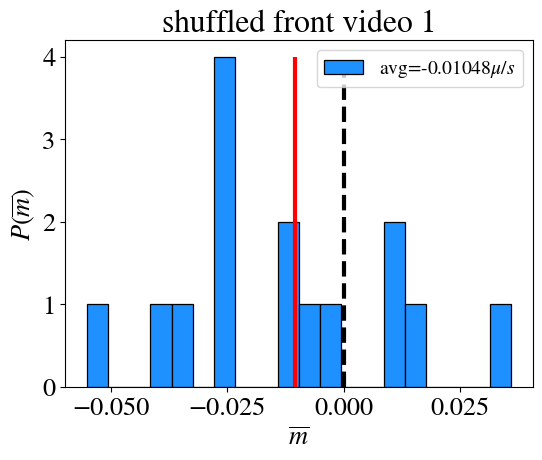

In [9]:
hist_plot(np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_1/shuffle_test/distance_to_nearest_AC/average_m.dat'),r"$\overline{m}$",r"$P(\overline{m})$",r"$\mu/s$",20,0.9,f'shuffled front video 1')

Video 2

In [12]:

AC_video2_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2_v2.csv')
ids_AC_video2 = AC_video2_dataframe['Track ID'].unique()
ACs_pos_DF = pd.read_csv('data/apoptotic_cells/bigger_videos/video_2/AC_positions_video2.csv',usecols=['X','Y'])
AC_positions = ACs_pos_DF.values
# AC_positions.shape
AC_names = ['A','B','C','D','E','F','G','H','I','J','K','L', 'M']
AC_video2_dataframe = AC_video2_dataframe.drop(columns=['Unnamed: 0'])
AC_video2_dataframe = AC_video2_dataframe.dropna()
# AC_video2_dataframe

In [13]:
ids = np.copy(ids_AC_video2)
np.random.shuffle(ids)
new_front_video2 = ids[:len(ids)//2]
new_back_video2 = ids[len(ids)//2:]


In [14]:
for i,id in enumerate(ids_AC_video2):
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    if id in new_front_video2:
        X = traj.values[:,2]
        Y = traj.values[:,3]
        time = traj.values[:,4]
    else:
        continue
    

    
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        with open(f'data/apoptotic_cells/bigger_videos/video_2/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
            kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')

In [16]:
for id in ids_AC_video2:
    
    traj= AC_video2_dataframe[AC_video2_dataframe['Track ID'] == id].sort_values('Frame')
    if id in new_front_video2:
        time = traj.values[:,4]
    else:
        continue

    lmin = np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_2/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat',usecols=1)
    M = np.diff(lmin)/np.diff(time)
    with open(f'data/apoptotic_cells/bigger_videos/video_2/shuffle_test/distance_to_nearest_AC/average_m.dat', 'a') as kk:
        kk.write(f'{np.average(M):.5f}\n')

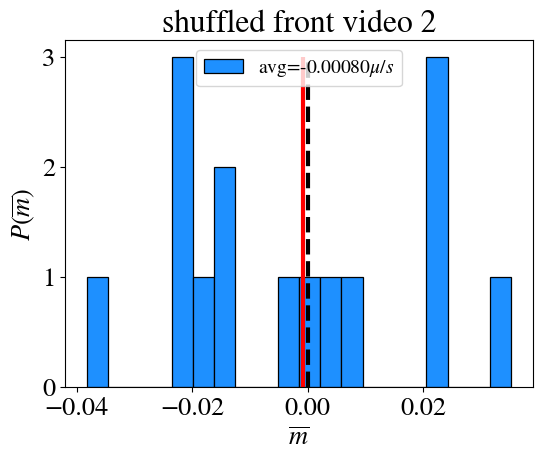

In [17]:
hist_plot(np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_2/shuffle_test/distance_to_nearest_AC/average_m.dat'),r"$\overline{m}$",r"$P(\overline{m})$",r"$\mu/s$",20,0.9,f'shuffled front video 2')

Video 5

In [18]:
video=5
AC_video5_dataframe = pd.read_csv('data/apoptotic_cells/bigger_videos/video_5/AC_positions_video5_v2.csv')
ids_AC_video5 = AC_video5_dataframe['Track ID'].unique()
AC_positions = np.loadtxt('data/apoptotic_cells/bigger_videos/video_5/AC_positions.dat')
AC_video5_dataframe = AC_video5_dataframe.dropna()
AC_video5_dataframe = AC_video5_dataframe.drop(columns=['Unnamed: 0'])
AC_video5_dataframe

,spot ID,Track ID,x (micron),y (micron),t (sec),Frame,Classification,squared displacement,vx,vy,speed
1,2050,0,70.690513,40.882507,3.348253,1,After_Contact,0.005356,0.015517,-0.015517,0.021945
2,2053,0,70.690513,40.882507,6.696506,2,After_Contact,0.005356,0.000000,0.000000,0.000000
3,2056,0,70.690513,40.986007,10.044759,3,After_Contact,0.005356,0.000000,0.031034,0.031034
4,2059,0,70.690513,40.986007,13.393013,4,After_Contact,0.005356,0.000000,0.000000,0.000000
5,2062,0,70.690513,40.986007,16.741266,5,After_Contact,0.005356,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6203,73762,30,116.230521,39.123007,656.257614,196,Before_Contact,277.715182,0.010345,-0.010345,0.014630
6204,73765,30,116.368521,39.261007,659.605867,197,Before_Contact,271.554445,0.041379,0.041379,0.058519
6205,73768,30,116.023521,39.364507,662.954120,198,Before_Contact,273.838536,-0.103448,0.031034,0.108003
6206,73771,30,115.920021,39.433507,666.302373,199,Before_Contact,273.473128,-0.031034,0.020690,0.037299


In [19]:
ids = np.copy(ids_AC_video5)
np.random.shuffle(ids)
new_front_video5 = ids[:len(ids)//2]
new_back_video5 = ids[len(ids)//2:]


In [ ]:
for i,id in enumerate(ids_AC_video5):
    traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')
    
    
    if id in new_back_video5:
        X = traj.values[:,2]
        Y = traj.values[:,3]
        time = traj.values[:,4]
    else:
        continue
    
    for t in range(len(X)):
        dist_to_ACs = []
        for cell in AC_positions:
            dist = np.sqrt((cell[0]-X[t])**2+(cell[1]-Y[t])**2)
            dist_to_ACs.append(dist)
        distante_to_nearestAC = np.min(dist_to_ACs)
        with open(f'data/apoptotic_cells/bigger_videos/video_5/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat', 'a') as kk:
            kk.write(f'{time[t]:.3f} {distante_to_nearestAC:.5f} \n')
        
    

In [21]:
for id in ids_AC_video5:
    
    
    if id in new_back_video5:
        traj= AC_video5_dataframe[AC_video5_dataframe['Track ID'] == id].sort_values('Frame')
        time = traj.values[:,4]
    else:
        continue
    lmin = np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_5/shuffle_test/distance_to_nearest_AC/lmin_time_id_{int(id)}.dat',usecols=1)
    M = np.diff(lmin)/np.diff(time)
    with open(f'data/apoptotic_cells/bigger_videos/video_5/shuffle_test/distance_to_nearest_AC/average_m.dat', 'a') as kk:
        kk.write(f'{np.average(M):.5f}\n')

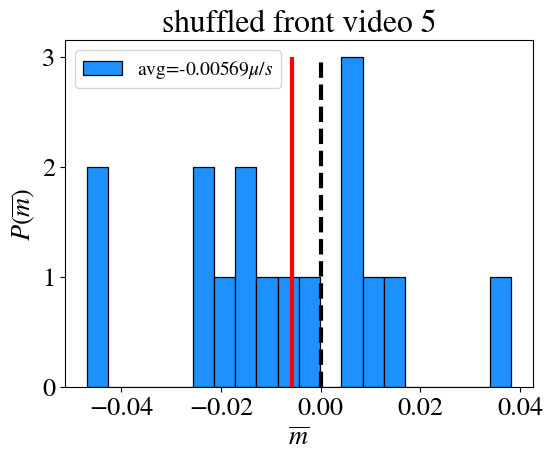

In [22]:
hist_plot(np.loadtxt(f'data/apoptotic_cells/bigger_videos/video_5/shuffle_test/distance_to_nearest_AC/average_m.dat'),r"$\overline{m}$",r"$P(\overline{m})$",r"$\mu m/s$",20,0.9,f'shuffled front video 5')

# pAC test with shuffled front

In [23]:
import pims
def diag(video):
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    Lx=frames.shape[2]
    Ly=frames.shape[1]
    if video == 2:
        ydiag = -np.arange(Lx)+Ly
        m = -1
        b = Ly
    if video == 3:
        ydiag = 1.7*np.arange(Lx)
        m = 1.7
        b = 0.0
    if video == 4:
        ydiag = np.arange(Lx)
        m = 1
        b = 0.0
    return ydiag,m,b
# diag_array,m,b = diag(video,x_max_px,y_max_px)

# Function to check if a point is below the line
def is_below_line(video,x, y,m,b):
    if video == 3:
        return y > m * x + b
    else:
        return y < m*x + b

# Generate a random point below the line
def generate_random_point(video,width, height,m,b):
    while True:
        x_rand = np.random.uniform(0, width)
        y_rand = np.random.uniform(0, height)
        if is_below_line(video,x_rand, y_rand,m,b):
            return x_rand, y_rand
        

def average_in_ranges(X, Y, step):
    # Create bins based on the specified step size
    min_x = np.min(X)
    max_x = np.max(X)
    bins = np.arange(min_x, max_x, step)
    
    # Initialize a list to store averages
    averages = []
    stds = []
    
    # Iterate through the bins to calculate averages
    for i in range(len(bins) - 1):
        mask = (X >= bins[i]) & (X <= bins[i + 1])
        if np.any(mask):
            avg = np.mean(Y[mask])
            std = np.std(Y[mask])
        else:
            avg = 0  # or you can use 0 or np.nan if you prefer
        averages.append(avg)
        stds.append(std)
        
        
    
    return bins, averages,stds

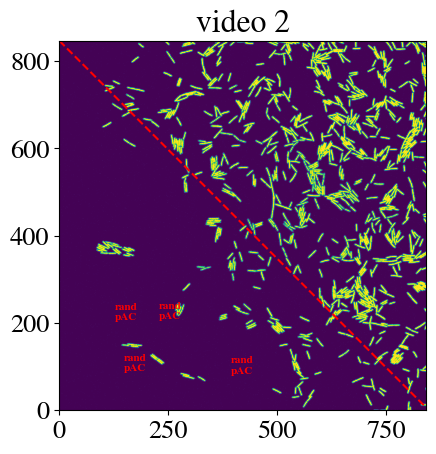

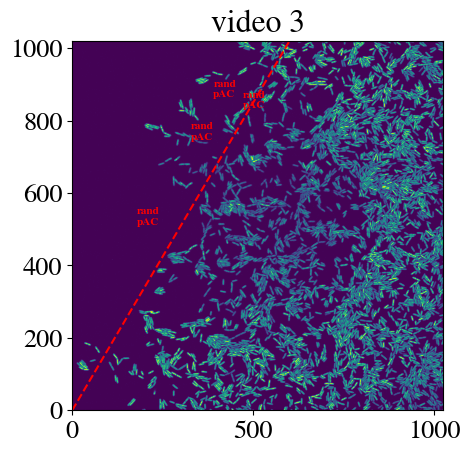

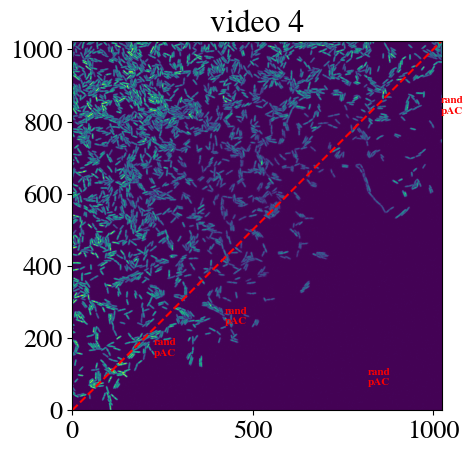

In [61]:

for video in [2,3,4]:

    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    # plt.imshow(frames_cells[0],cmap='inferno',alpha=1)
    # plt.imshow(frames_bacs[0],alpha=0.5)
    ppm=4.8309
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]


    plt.imshow(frames[0],origin='lower')
    Lx_array = np.arange(x_max_px)
    # video=3
    diag_array,m,b = diag(video)
    pos_random_ACs = []
    for i in range(4):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    for pos in pos_random_ACs:
        plt.annotate('rand\npAC',xy=(pos[0],pos[1]),color='red',weight='bold',size=8)

    # plt.scatter(x_point,y_point, color='red')
        
    plt.plot(np.arange(x_max_px),diag_array,color='red', ls='--' )
    plt.title(f'video {video}')
    # plt.fill_between(Lx_array,diag_array,color='red',alpha=0.5)

    plt.xlim((0,x_max_px))
    plt.ylim((0,y_max_px))
    plt.show()

In [39]:
videos= [2,3,4]
ids_all = []
ids_front_shuffled_all = []
for video in videos:
    a = np.loadtxt(f'data/new-videos/video{video}/ids_video{video}.dat',dtype=int)
    ids_all.append(a)

    ids = np.copy(a)
    np.random.shuffle(ids)
    new_front = ids[:len(ids)//2]
    # new_back_video5 = ids[len(ids)//2:]
    ids_front_shuffled_all.append(new_front)
    




In [46]:
import statsmodels.api as sm
ppm=4.8309

def generate_one_conf(video,ids,ACnumber):
    pos_random_ACs = []
    frames = pims.open(f'data/new-videos/video{video}/original_frames/*.tif')
    x_max_px=frames.shape[2]
    y_max_px=frames.shape[1]
    diag_array,m,b = diag(video)
    
    for i in range(ACnumber):
        x_point, y_point = generate_random_point(video,x_max_px,y_max_px,m,b)
            
        pos_random_ACs.append([x_point,y_point])

    pos_random_ACs = np.array(pos_random_ACs)/ppm
    
    for id in ids:
        
        traj = np.loadtxt(f'data/new-videos/video{video}/time_x_y/time_x_y_id_{id}.dat')
        file_name_min = f'data/new-videos/video{video}/phantom_AC_statistics/shuffle_test/id_{id}_dist_PAC.dat'
        x = traj[:,1]        
        y = traj[:,2]
        # speed = np.loadtxt(f'data/new-videos/video{video}/velocities/mag_v_time_bact_id_{id}.dat',usecols=1)
        time = traj[:,0]
        min_dist_list = []
        for t in range(len(time)):
            dist_at_time_t=[]
            for cell in pos_random_ACs:
            
                dist_to_cell = np.sqrt((cell[0] - x[t])**2 + (cell[1] - y[t])**2)
                dist_at_time_t.append(dist_to_cell)
            
            
            min_dist_to_apoptotic = min(dist_at_time_t)
            min_dist_list.append(min_dist_to_apoptotic)
        np.savetxt(file_name_min,np.c_[time,min_dist_list],fmt='%.3f')
        
    return None
        
def dist_to_phantom_calc(video,ids,ids2): 
        
    average_m_list = []  
    for id in ids:
        if id in ids2:
        

            file_name_min = f'data/new-videos/video{video}/phantom_AC_statistics/shuffle_test/id_{id}_dist_PAC.dat'
                # file_name_min_deriv = f'/media/janne/Transcend/bacteria/apoptotic_cells/distance_nearest_apop_cell/phantom_AC/id_{id}_dist.dat'
            file_min = np.loadtxt(file_name_min,usecols=(0,1))
            time = file_min[:,0]
                
            dist = file_min[:,1]
            lowess = sm.nonparametric.lowess
                    


            traj= lowess(dist,time,frac=0.09,it=1, return_sorted=True)
            deriv_from_smoothed = np.diff(traj[:,1])/np.diff(time)
            average_m = np.average(deriv_from_smoothed)
            average_m_list.append(average_m)
        else:
            continue

    return average_m_list


In [ ]:
for video in [2]:
    if video == 2:
        ids1 = ids_all[0]
        ids2 = ids_front_shuffled_all[0]
    if video == 3:
        ids1 = ids_all[1]
        ids2 = ids_front_shuffled_all[1]
    if video == 4:
        ids1 = ids_all[2]
        ids2 = ids_front_shuffled_all[2]
        

    def generate_one_value_for_one_conf(video,N):
        values_for_distribution = []
        for n in range(N):
            generate_one_conf(video,ids1,4)
            values_for_distribution.append(np.average(dist_to_phantom_calc(video,ids1,ids2)))
        return values_for_distribution
    Nreals = 100
    data = generate_one_value_for_one_conf(video,Nreals)

    np.savetxt(f'data/new-videos/video{video}/phantom_AC_statistics/shuffle_test/video{video}_values_for_stat_Nreals_{Nreals}.dat',data,fmt='%.4f')

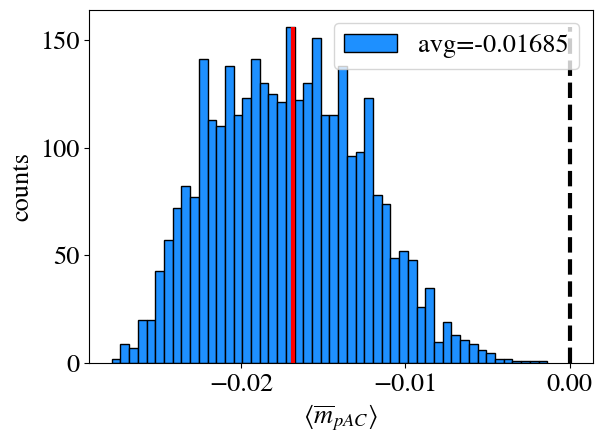

In [66]:
video=4
Nreals=3333
data = np.loadtxt(f'data/new-videos/video{video}/phantom_AC_statistics/shuffle_test/video{video}_values_for_stat_Nreals_{Nreals}.dat')
bins=50
fig, ax2=plt.subplots()
data_2,bins_2=np.histogram(data,bins=bins)
binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)
ax2.bar(bins_2[:-1],data_2,width=bins_2[1]-bins_2[0],color='dodgerblue',label=f'avg={Exp_2:.5f}' ,linewidth=1,edgecolor='black')
ax2.vlines(0,0,max(data_2),color='black',lw=3,ls='--')
ax2.vlines(Exp_2,0,max(data_2),color='red',lw=3,ls='-')

ax2.set_xlabel(r'$\langle\overline{m}_{pAC}\rangle$')
ax2.set_ylabel('counts')
# ax2.set_title(f'video {video}, average m statistics {Nreals} reals \n with leading edge traj')
ax2.legend()
plt.tight_layout()
# plt.savefig(f'data/new-videos/video{video}/phantom_AC_all_traj_only_empyt_spaces/hist_video{video}_avgm_statistics_Nreals_{Nreals}_leadingedge_2.pdf',dpi=300,bbox_inches="tight")
plt.show()

In [55]:
def pvalue_calculator(binscenters_2,data_2,value,avg):
    
    """
    binscenters_2 = values in centers (x axis)
    data_2 = counts (y axis)
    value = reference value
    
    """
    a=binscenters_2[:-1]
    if value > avg:
    

        where = np.nonzero(a > value)
        c=data_2[where[0][-1]:]
    if value < avg:
        where = np.nonzero(a < value)
        c=data_2[:where[0][-1]]


    

    pvalue=np.trapz(c)
    return pvalue

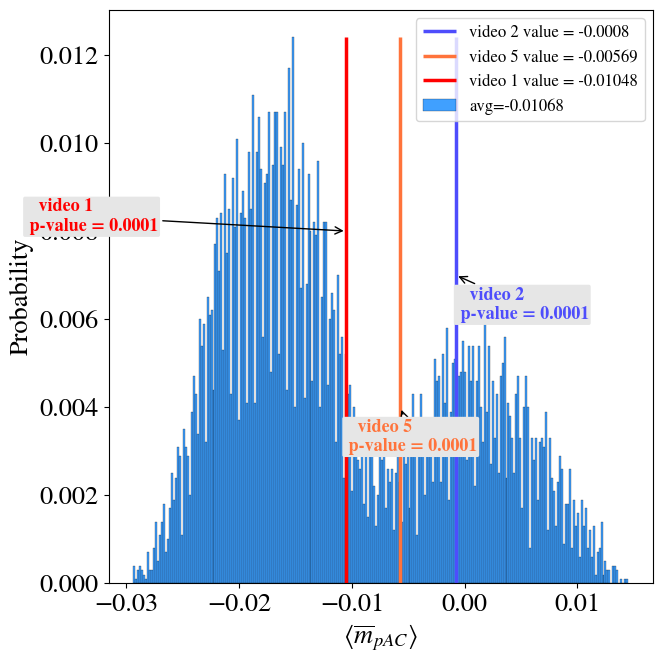

In [63]:
Nreals = 3333
video2 = np.loadtxt(f'data/new-videos/video2/phantom_AC_statistics/shuffle_test/video2_values_for_stat_Nreals_{Nreals}.dat')
video3 = np.loadtxt(f'data/new-videos/video3/phantom_AC_statistics/shuffle_test/video3_values_for_stat_Nreals_{Nreals}.dat')
video4 = np.loadtxt(f'data/new-videos/video4/phantom_AC_statistics/shuffle_test/video4_values_for_stat_Nreals_{Nreals}.dat')
all_data = np.concatenate((video2,video3,video4),axis=0)
apop_cells_values = {'video 2':-0.00080,'video 5':-0.00569, 'video 1': -0.01048}
video_type = list(apop_cells_values.keys())

bins=250
fig, ax2=plt.subplots(figsize=(7,7))
data_2,bins_2=np.histogram(all_data,bins=bins,density=False)
data_2 = data_2/np.sum(data_2)
binscenters_2=0.5*(bins_2[1:]+bins_2[:-1])
Exp_2 = np.sum(binscenters_2*data_2)/np.sum(data_2)

# a=binscenters_2[:-1]

# where = np.nonzero(a < -0.028)
# # apop_cells_values['big video 2']

# c=data_2[:where[0][-1]]

pvalue=pvalue_calculator(binscenters_2,data_2,apop_cells_values['video 1'],Exp_2)
pvalue_video2 = pvalue_calculator(binscenters_2,data_2,apop_cells_values['video 2'],Exp_2)
pvalue_video5 = pvalue_calculator(binscenters_2,data_2,apop_cells_values['video 5'],Exp_2)

ax2.bar(bins_2[:-1],data_2,width=bins_2[1]-bins_2[0],color='dodgerblue' ,linewidth=0.2,edgecolor='black',alpha=0.85,label=f'avg={Exp_2:.5f}')
# ax2.vlines(0,0,max(data_2),color='black',lw=2,ls='--')

# ax2.vlines(Exp_2,0,max(data_2),color='blue',lw=1.5,ls='-',label=f'avg={Exp_2:.5f}')
# ax2.hlines(0.01,0.001,,lw=1.9,label=f'p-value = {pvalue:.3f}',color='black',ls='--')
ax2.set_xlabel(r'$\langle\overline{m}_{pAC}\rangle$')
ax2.set_ylabel('Probability')
color = plt.cm.rainbow([0.1,0.85,1])
for i,c in enumerate(color):
    x=video_type[i]
    ax2.vlines(apop_cells_values[x],0,max(data_2),lw=2.5,label=x + f' value = {apop_cells_values[x]}',color=c)
    
ax2.annotate(f'   video 1 \n p-value = {pvalue:.4f}', 
             xy=(apop_cells_values['video 1'], 0.008),  # arrow pointing here
             xytext=(-0.039, 0.008),bbox=dict(boxstyle="round,pad=0.1", fc="0.9",ec='none'),  # location of text
             arrowprops=dict(facecolor='black', arrowstyle="->"),fontsize=13,fontweight='bold',color=color[2])
ax2.annotate(f'   video 2 \n p-value = {pvalue_video2:.4f}', 
             xy=(apop_cells_values['video 2'], 0.007),  # arrow pointing here
             xytext=(apop_cells_values['video 2'], 0.006), bbox=dict(boxstyle="round,pad=0.1", fc="0.9",ec='none'), # location of text
             arrowprops=dict(facecolor='black', arrowstyle="->"),fontsize=13,fontweight='bold',color=color[0])
ax2.annotate(f'   video 5 \n p-value = {pvalue_video5:.4f}', 
             xy=(apop_cells_values['video 5'], 0.004),  # arrow pointing here
             xytext=(apop_cells_values['video 5']-0.005, 0.003),  bbox=dict(boxstyle="round,pad=0.1", fc="0.9",ec='none'),# location of text
             arrowprops=dict(facecolor='black', arrowstyle="->"),fontsize=13,fontweight='bold',color=color[1])
# ax2.set_title(f'all videos, average m statistics {Nreals} reals each')


ax2.legend(fontsize=12,loc='upper right')
plt.tight_layout()
# plt.savefig(f'data/new-videos/shuffle_test/hist_pAC_allvideos_avgm_statistics_Nreals_{Nreals}each_with_leading_edge_and_pACs_on_front.png',dpi=200,)
# plt.savefig(f'data/new-videos/shuffle_test/hist_pAC_allvideos_avgm_statistics_Nreals_{Nreals}each_with_leading_edge_and_pACs_on_front.pdf',dpi=200,bbox_inches="tight")
plt.show()